<a href="https://colab.research.google.com/github/Lakeeli/My-Research/blob/main/Copy_of_Final_copy_of_my_Research_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program intends to predict HIV patients likelily to drop out of medical care

In [ ]:
%%capture
!pip install pycaret


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
import random
import pycaret
from   pycaret.classification import *
np.random.seed(42)
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

drive.mount('/content/gdrive')

#load the first data set


Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded= files.upload()


Saving data3.csv to data3.csv


In [ ]:
df = pd.read_csv('data3.csv', encoding='latin-1')
df.head(10)

,Patient No,Branch No,First Visit Date,Last Visit Date,Last Appointment Date,Gender,Birth Date,Age,Combinatio.On,Marital Status,Address District,Address Parish,Address Village,Address Phone,Weight,Height,BMI,Start ART Date,Supporter Phone,Start ART Regimen,WHO Stage,Status,TB Status,Drug Line,DSD Model,Advanced HIV Disease Status
0,MTC3907,Mukono General Hospital,09-Mar-16,28-Oct-22,26-Apr-23,Male,15-Mar-75,37,TDF/3TC/DTG,Married,Kampala,KAWEMPE I,KAKUNGULU,YES,70,197.0,28.263469,Mar 9 2016,YES,AZT+3TC+NVP,Stage III,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No Advanced HIV Disease
1,MTC10853,Mukono General Hospital,05-Sep-13,17-Feb-23,17-May-23,Male,01-Jan-73,40,TDF/3TC/DTG,Married,Kampala,MULAGO II,KATALE ZONE,YES,59,167.0,33.726228,Sep 10 2013,YES,TDF+3TC+EFV,Stage II,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No advanced HIV Disease
2,MTC14957,Mukono General Hospital,13-Jul-18,06-Oct-22,01-Feb-23,Female,30-Jun-94,30,TDF/3TC/DTG,Other,Kampala,NAJJANANKUMBI I,CENTRAL ZONE,YES,75,161.0,20.121422,Jul 13 2018,YES,TDF/3TC/DTG,Stage I,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No Advanced HIV Disease
3,MTC1006,Mukono General Hospital,28-Feb-14,20-Jan-23,21-Apr-23,Female,01-Jan-75,48,TDF/3TC/DTG,Married,Mukono,NAMUMIRA-ANTHONY,NAMUMIRA,YES,67,172.0,26.936066,Feb 28 2014,YES,AZT+3TC+NVP,Stage III,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No advanced HIV Disease
4,MTC29047,Mukono General Hospital,28-Apr-17,07-Mar-23,05-Sep-23,Female,01-Jan-79,34,TDF/3TC/DTG,Married,Kampala,KIBULI,KIBULI CENTRAL ZONE,YES,70,182.0,26.111429,Sep 10 2010,YES,TDF+3TC+EFV,Stage I,0,No signs/symptoms,First Line,FBIM - Facility Based Individual Management,No advanced HIV Disease
5,MTC9902,Mukono General Hospital,06-Jun-18,04-Oct-22,05-Apr-23,Female,01-Jan-91,32,TDF/3TC/DTG,Divorced,Kampala,MAKINDYE I,MILITARY BARRACKS,YES,48,155.0,47.293837,Dec 1 2017,YES,TDF+3TC+EFV,Stage I,0,No signs/symptoms,First Line,FBG - Facility Based Group,No Advanced HIV Disease
6,MTC14235,Mukono General Hospital,14-Oct-21,23-Nov-22,28-Apr-23,Female,01-Nov-95,27,TDF/3TC/DTG,Single,Kampala,KIBUYE II,KIRUNDU,YES,68,155.0,23.565095,Oct 27 2021,YES,TDF+3TC+EFV,Stage I,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No Advanced HIV Disease
7,MTC9281,Mukono General Hospital,16-Feb-18,13-Jul-22,18-Jan-23,Male,01-Jan-91,32,TDF/3TC/DTG,Divorced,Kampala,OLD KAMPALA,OLD KAMPALA ZONE I,YES,46,151.0,50.166824,Feb 16 2018,NO,TDF+3TC+EFV,Stage II,0,No signs/symptoms,First Line,CCLAD - Community Client Led ART Delivery,No Advanced HIV Disease
8,MTC15522,Mukono General Hospital,12-Mar-14,07-Mar-23,05-Sep-23,Female,01-Jan-75,45,TDF/3TC/DTG,Married,Mukono,KABEMBE,KABEMBE,YES,54,173.0,41.707476,Mar 12 2014,NO,TDF/3TC/DTG,Stage I,0,No signs/symptoms,First Line,FTDR - Fast Track Drug Refill,No advanced HIV Disease
9,MTC13886,Mukono General Hospital,29-Jul-08,22-Feb-23,24-May-23,Female,06-Aug-90,32,TDF/3TC/DTG,Married,Kampala,BUKESA,CHURCH ZONE,YES,74,183.0,23.493243,NaN,NO,TDF+3TC+EFV,Stage I,0,No signs/symptoms,First Line,FBG - Facility Based Group,No Advanced HIV Disease


In [ ]:
df.shape

(2189, 26)

df.info()

In [ ]:
#Drop the raws with missing values
df = df.dropna(axis = 0)
df.shape

(2140, 26)

In [ ]:
#Cleaning the data, drop the patient id column
df = df.drop(['Patient No'], axis=1)
df.shape

(2140, 25)

In [ ]:
columns_to_drop = ['Branch No ', 'First Visit Date', 'Last Visit Date', 'Last Appointment Date', 'Birth Date', 'Start ART Date']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.shape

(2140, 19)

Exploratory Data Analysis

In [ ]:
#Get some statistics
df.describe()

,Age,Weight,Height,BMI,Status
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,34.478505,61.606075,160.141449,33.898312,0.519159
std,10.137023,11.782407,9.944000,23.082475,0.499750
min,1.000000,13.000000,62.000000,3.326058,0.000000
25%,29.000000,56.000000,158.000000,25.085424,0.000000
50%,33.000000,60.000000,160.000000,31.244444,1.000000
75%,40.000000,68.000000,164.000000,35.556694,1.000000
max,76.000000,181.000000,197.000000,357.739645,1.000000


In [ ]:
#Get the a count of the number of Lost To Follow Up (1) patients and Active (0) patients
df['Status'].value_counts()

1    1111
0    1029
Name: Status, dtype: int64

In [ ]:
df['Gender'].value_counts()

Female    1575
Male       565
Name: Gender, dtype: int64

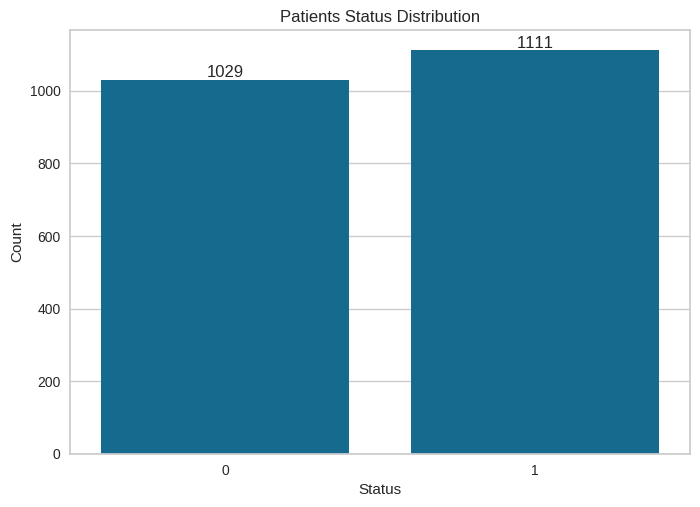

In [ ]:
#Get the counts for each category
sns.countplot(x='Status', data=df)
counts = df['Status'].value_counts()

# Manually specify positions and text for annotations
annotation_positions = [0, 1]  # x-coordinates for annotations
annotation_text = ['1029', '1111']  # Text to display on the bars

# Add count figures on top of the bars
for pos, text in zip(annotation_positions, annotation_text):
    count_value = counts[pos]  # Access the count value using the integer key
    plt.annotate(text, xy=(pos, count_value), ha='center', va='bottom')

# Customize the plot
plt.title('Patients Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()







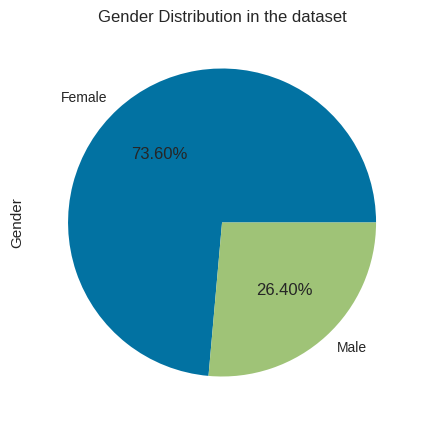

<Figure size 800x550 with 0 Axes>

In [ ]:
#A pie chart showing how
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
# Customize the plot
plt.title('Gender Distribution in the dataset')
plt.show()
plt.savefig('gender.png')  # Exporting image

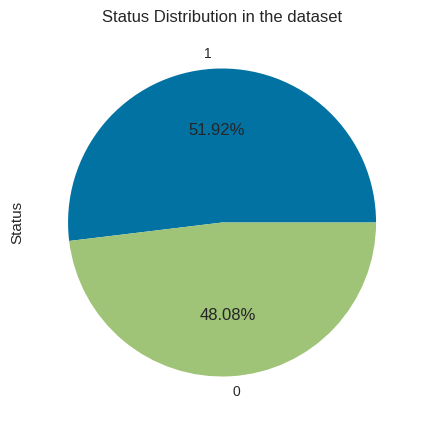

<Figure size 800x550 with 0 Axes>

In [ ]:
#A pie chart showing how
plt.figure(figsize=(5,5))
df['Status'].value_counts().plot(kind='pie',autopct='%.2f%%')
# Customize the plot
plt.title('Status Distribution in the dataset')
plt.show()
plt.savefig('gender.png')  # Exporting image

This implies that 51% of the population cosiderded in this study are LTFU patients while 49% of the population are active patients.

<Axes: ylabel='Density'>

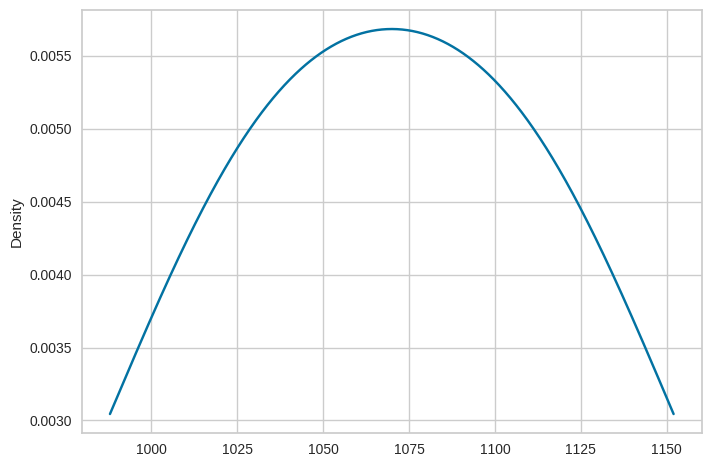

In [ ]:
# Target/Dependent variable is the Outcome Column. It shows if someone will be able to buy (1) or not (0)

df.Status.value_counts().plot(kind= "density")

<Axes: >

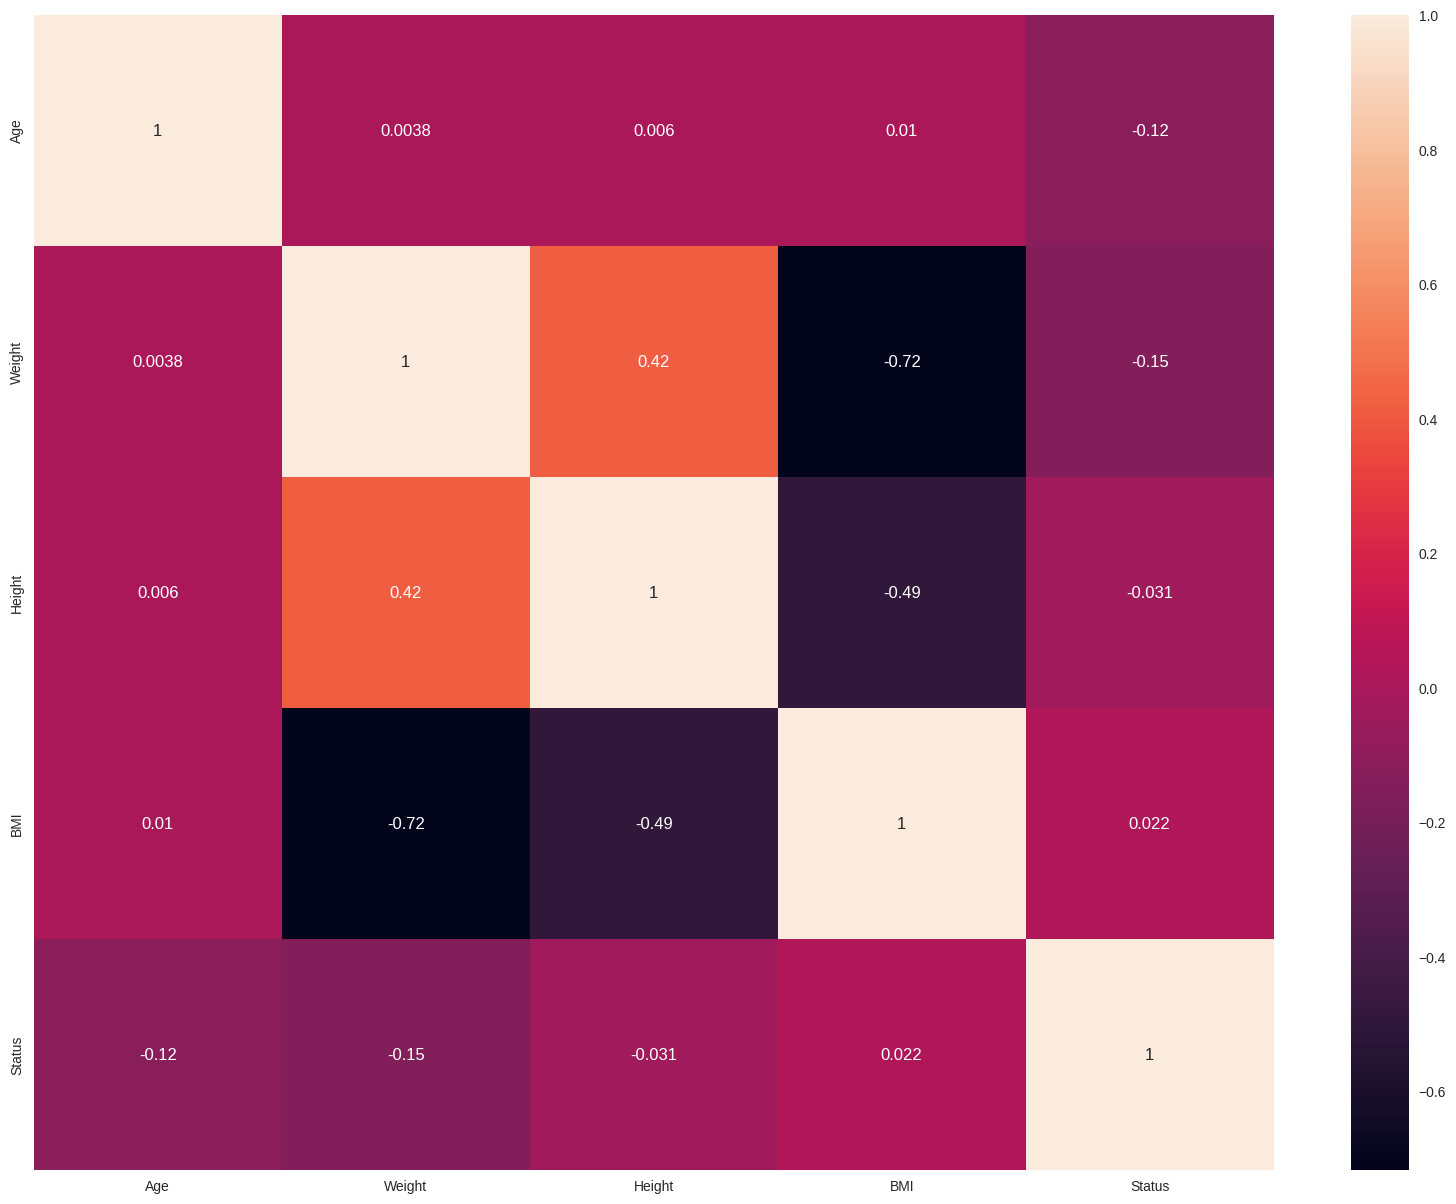

In [ ]:
#Visualise the correlations to show the relationship between the different features
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:
len(df['Marital Status'].unique())

4

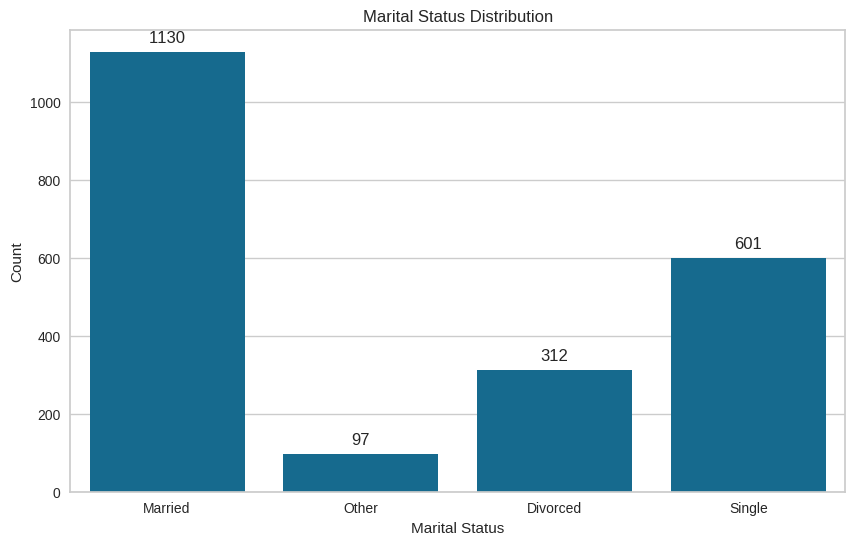

In [ ]:
# Create a subplot or an Axes object
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Visualize the count of survivors
sns.countplot(x='Marital Status', data=df, ax=ax)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

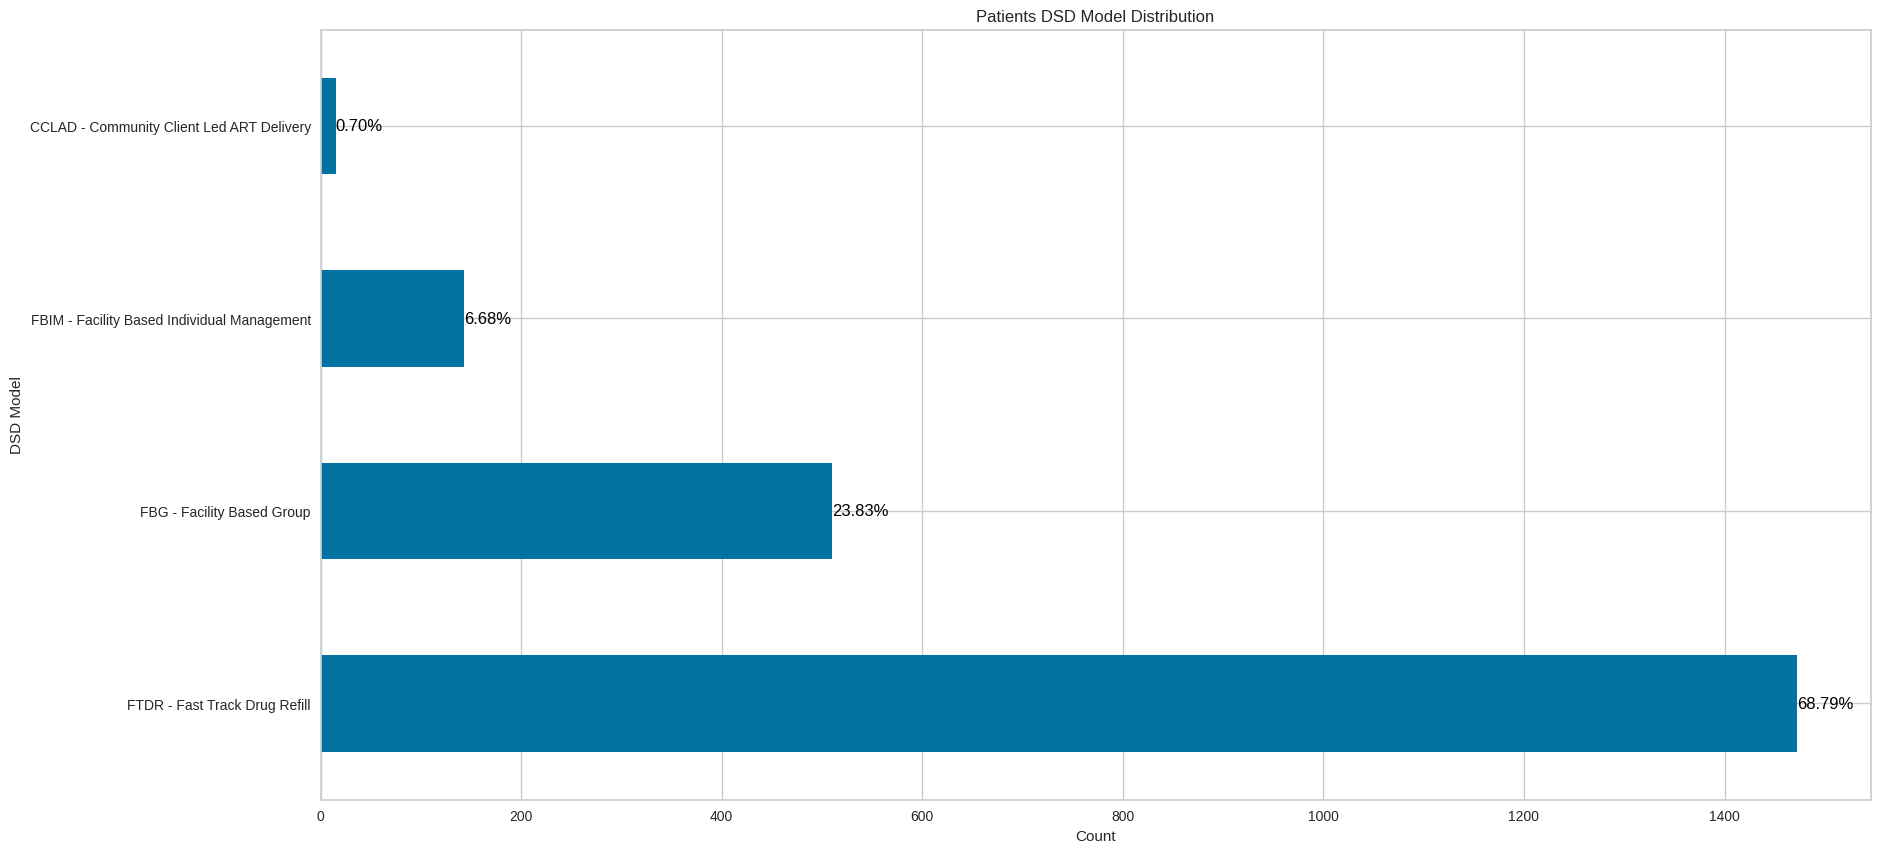

In [ ]:
#Patients DSD Model Distribution

df['DSD Model'].value_counts().plot(kind='barh', figsize=(20,10))

# Calculate the percentage for each bar
total = df['DSD Model'].value_counts().sum()
for i, v in enumerate(df['DSD Model'].value_counts().head(30)):
    percentage = f"{(v / total) * 100:.2f}%"
    plt.text(v, i, percentage, color='black', va='center')

# Display the graph
plt.title('Patients DSD Model Distribution')
plt.xlabel('Count')
plt.ylabel('DSD Model')
plt.show()

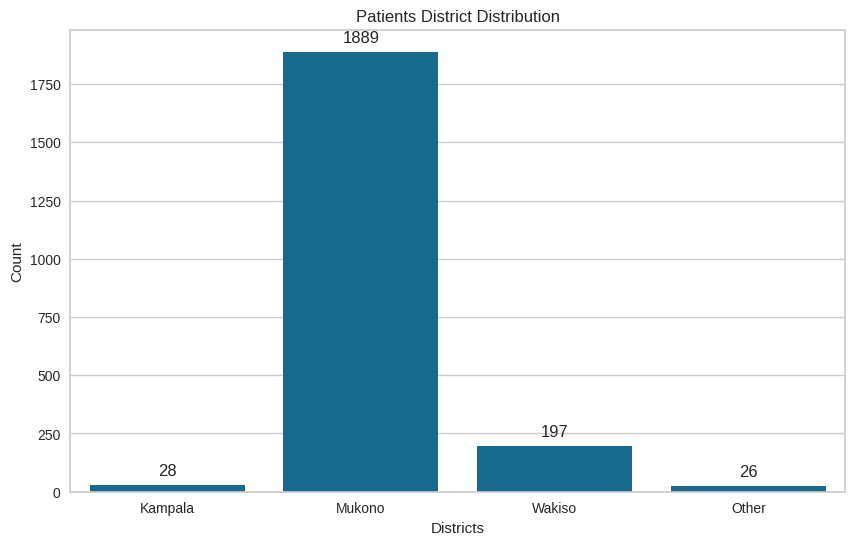

In [ ]:
# Create a subplot or an Axes object
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size if needed
ax = plt.gca()

# Visualize the count of survivors
sns.countplot(x='Address District', data=df, ax=ax)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Patients District Distribution')
plt.xlabel('Districts')
plt.ylabel('Count')
plt.show()

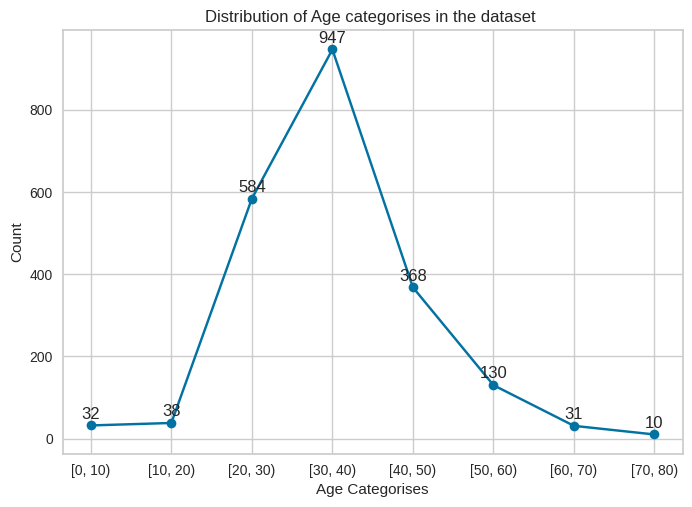

In [ ]:
#Distribution of Age categorises in the dataset
age_bins = range(0, df['Age'].max() + 11, 10)

# Create a new column 'Age Group' by binning the 'Age' column
df['Age Category'] = pd.cut(df['Age'], bins=age_bins, right=False)

# Group the data by 'Age Group' and calculate the count in each group
age_group_counts = df.groupby('Age Category').size()

# Convert the index (age groups) to strings for the line plot
age_group_counts.index = age_group_counts.index.astype(str)

# Create the line plot
plt.plot(age_group_counts.index, age_group_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Age Categorises')
plt.ylabel('Count')
plt.title('Distribution of Age categorises in the dataset ')

#Show the number of counts for each age category on the line plot
for x, y in zip(age_group_counts.index, age_group_counts.values):
    plt.annotate(str(y), xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')

# Show the plot
plt.show()







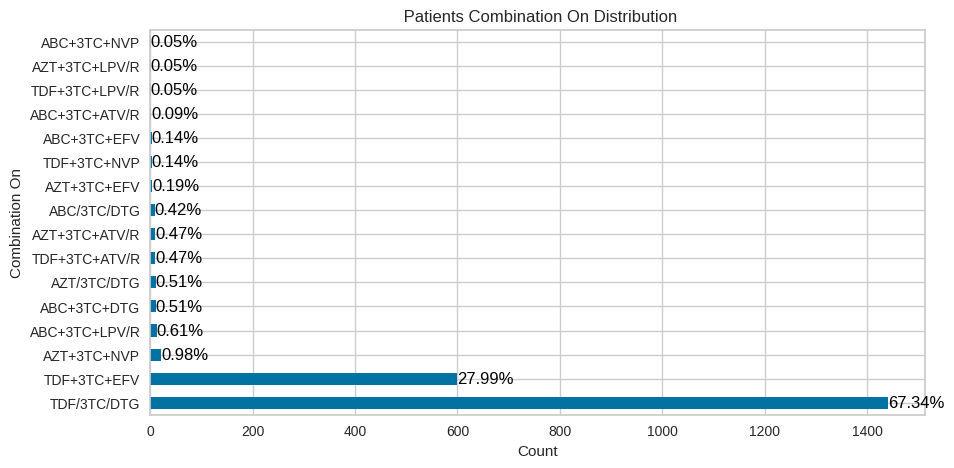

In [ ]:
# Patients Start ART Regimen Distribution

df['Combinatio.On'].value_counts().plot(kind='barh', figsize=(10,5), title=" Patients Combination On Distribution")

# Calculate the percentage for each bar
total = df['Combinatio.On'].value_counts().sum()
for i, v in enumerate(df['Combinatio.On'].value_counts().head(30)):
    percentage = f"{(v / total) * 100:.2f}%"
    plt.text(v, i, percentage, color='black', va='center')

# Display the graph
plt.xlabel('Count')
plt.ylabel('Combination On')
plt.show()

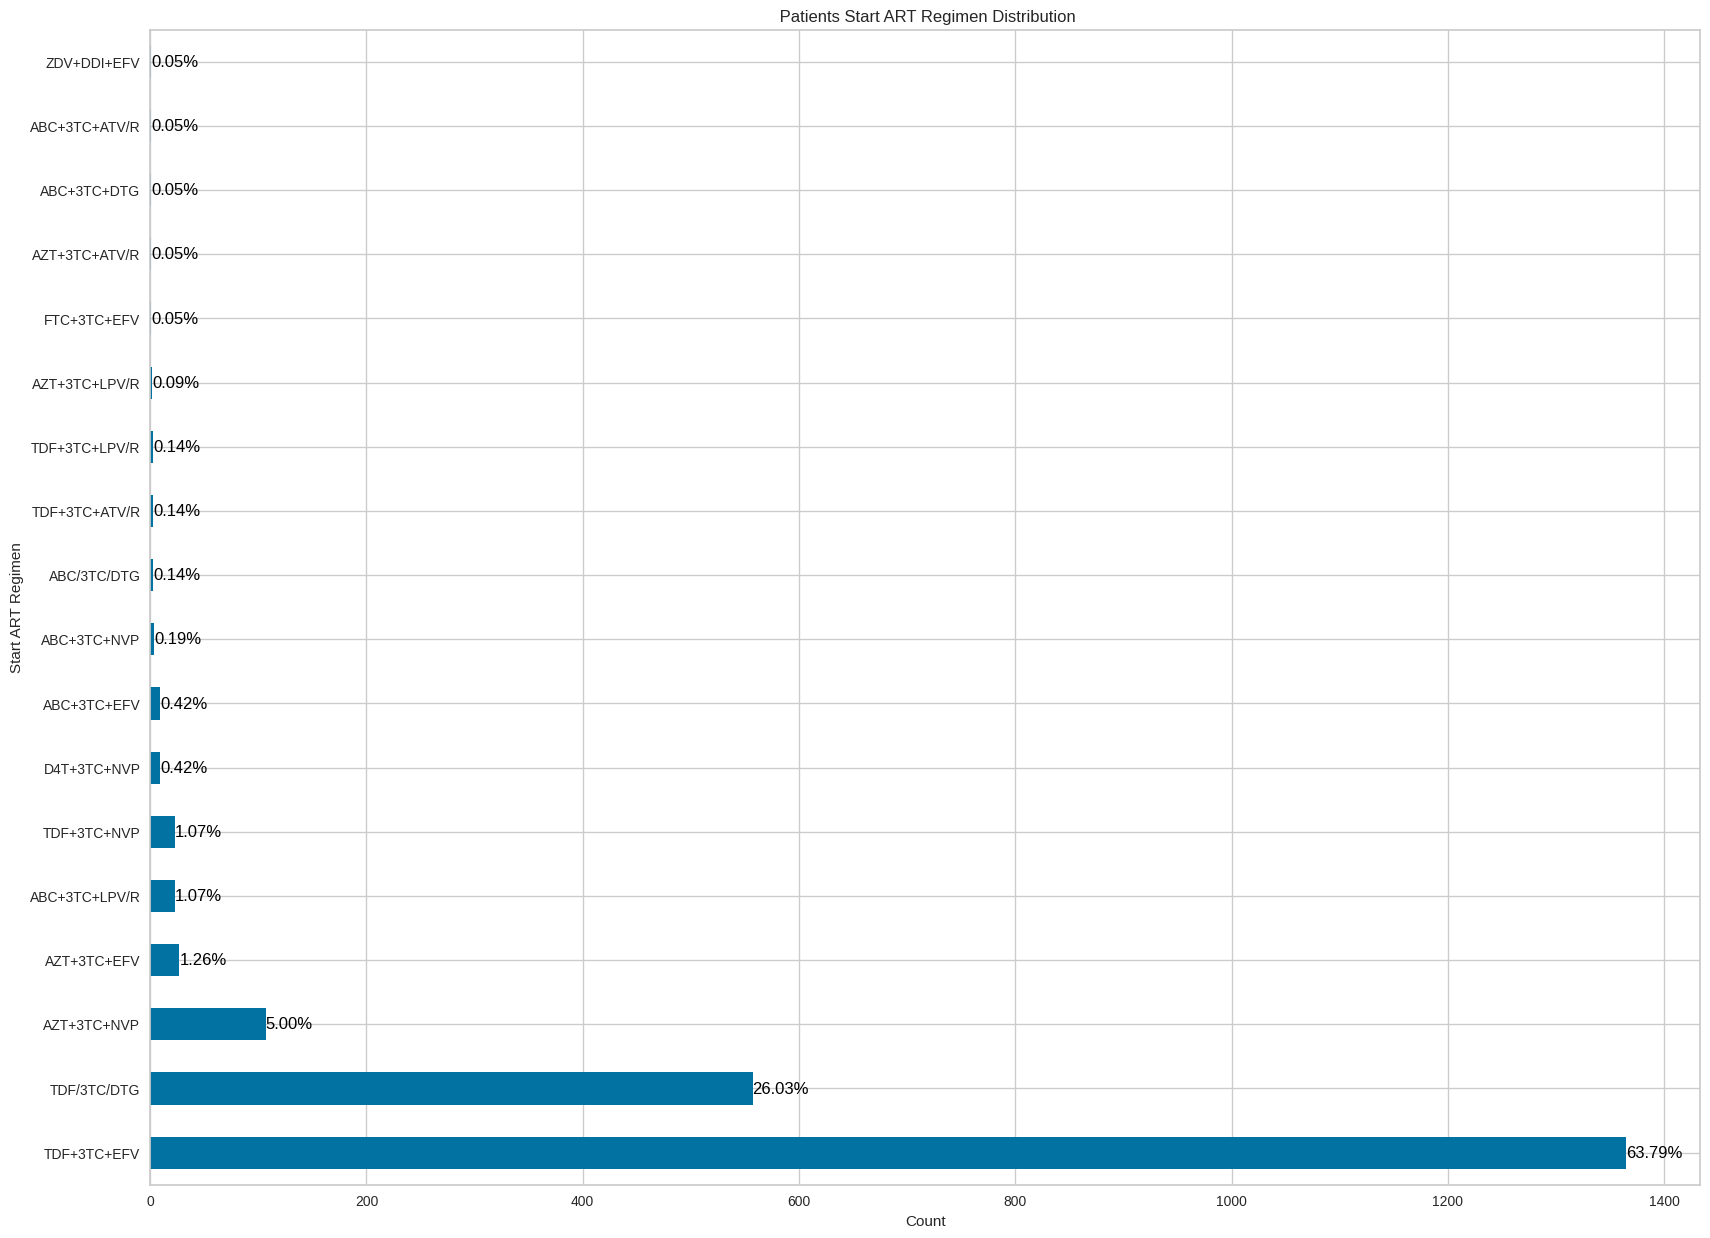

In [ ]:
# Patients Start ART Regimen Distribution

df['Start ART Regimen'].value_counts().plot(kind='barh', figsize=(20,15), title=" Patients Start ART Regimen Distribution")

# Calculate the percentage for each bar
total = df['Start ART Regimen'].value_counts().sum()
for i, v in enumerate(df['Start ART Regimen'].value_counts().head(30)):
    percentage = f"{(v / total) * 100:.2f}%"
    plt.text(v, i, percentage, color='black', va='center')

# Display the graph
plt.xlabel('Count')
plt.ylabel('Start ART Regimen')
plt.show()

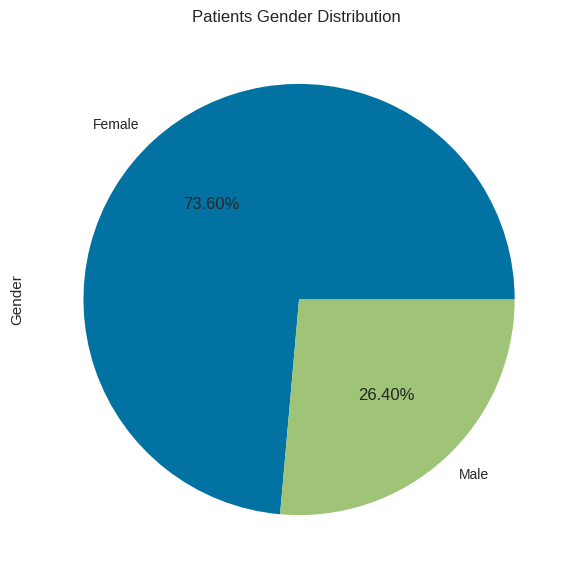

In [ ]:
# Gender Distribution in the dataset

plt.figure(figsize=(7,7))
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Patients Gender Distribution ')
plt.show()


This implies that 73% of the patients in this dataset are females while 27% of the patient are males.

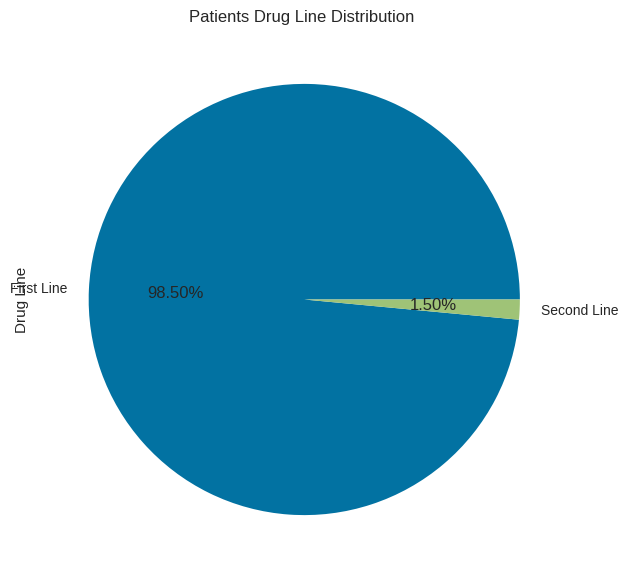

In [ ]:
 #Gender Distribution in the dataset

plt.figure(figsize=(7,7))
df['Drug Line'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Patients Drug Line Distribution ')
plt.show()


Bivariate analysis

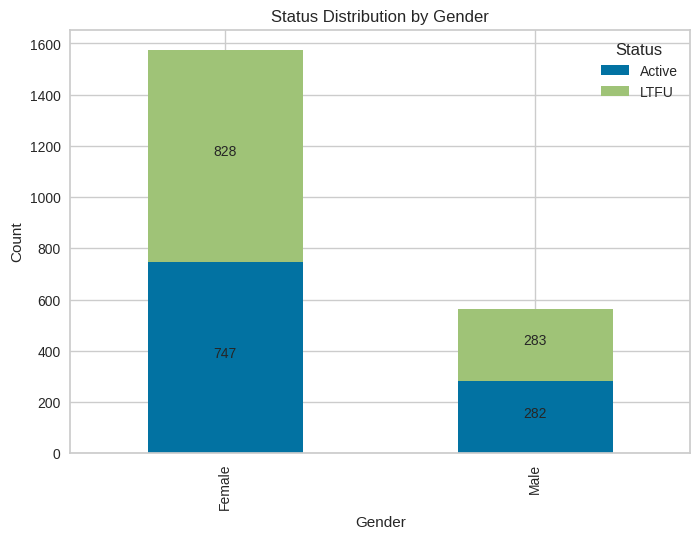

In [ ]:
#Visualize the count of Active and LTFP patients by gender
gender_status_counts = df.groupby(['Gender', 'Status']).size().unstack()

# Create a stacked bar plot
ax = gender_status_counts.plot(kind='bar', stacked=True)

# Add count figures on top of each section of the bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, fmt='%d', padding=3)

# Customize the plot
plt.title('Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Active', 'LTFU'])

plt.show()

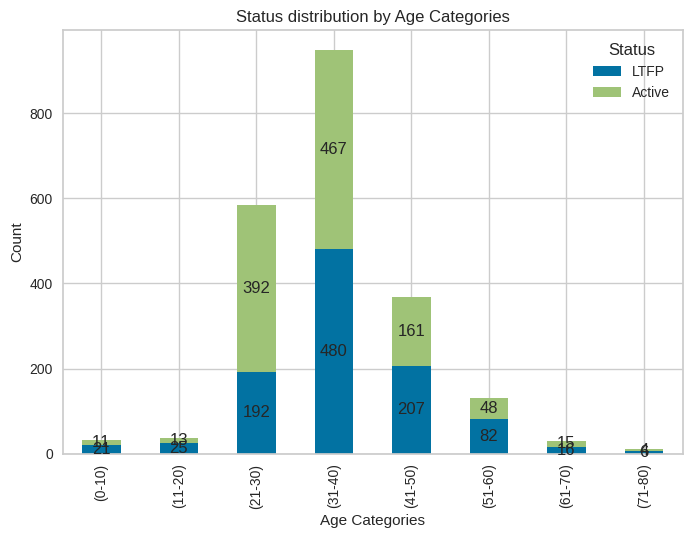

In [ ]:
# Define custom age categories
age_categories = ['(0-10)', '(11-20)', '(21-30)', '(31-40)', '(41-50)', '(51-60)', '(61-70)', '(71-80)']

# Create a new column 'Age Category' by mapping 'Age' to the custom categories
df['Age Category'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=age_categories, right=False)

# Group the data by 'Age Category' and 'status' and calculate the count in each group
age_status_counts = df.groupby(['Age Category', 'Status']).size().unstack(fill_value=0)

# Create a bar plot for the bivariate analysis
ax = age_status_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.title('Status distribution by Age Categories')

# Show the number of counts for each age category on the bars
for i, v in enumerate(age_status_counts.values):
    total_height = 0
    for val in v:
        plt.text(i, total_height + val/2, str(val), ha='center', va='center')
        total_height += val

# Show the legend
ax.legend(title='Status', loc='upper right', labels=['LTFP', 'Active'])

# Show the plot
plt.show()








In [ ]:
for col in df.columns:
    if col not in ['Status']:
        # Calculate the contingency table
        contingency = pd.crosstab(df[col], df['Status'])
        # Calculate the percentage table
        contingency_pct = pd.crosstab(df[col], df['Status'], normalize='index')
        # Calculate the p-value
        c, p, dof, expected = chi2_contingency(contingency)
        # Print the column name and p-value rounded to 3 decimal places
        print(f"{col}: {round(p, 3)}")

Gender: 0.335
Age: 0.0
Combinatio.On: 0.0
Marital Status: 0.0
Address District: 0.458
Address Parish: 0.0
Address Village: 0.0
Address Phone: 0.0
Weight: 0.0
Height: 0.0
BMI: 0.0
Supporter Phone: 0.0
Start ART Regimen: 0.0
WHO Stage: 0.041
TB Status: 0.522
Drug Line: 0.501
DSD Model: 0.0
Advanced HIV Disease Status: 0.0
Age Category: 0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2188
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       2140 non-null   object  
 1   Age                          2140 non-null   int64   
 2   Combinatio.On                2140 non-null   object  
 3   Marital Status               2140 non-null   object  
 4   Address District             2140 non-null   object  
 5   Address Parish               2140 non-null   object  
 6   Address Village              2140 non-null   object  
 7   Address Phone                2140 non-null   object  
 8   Weight                       2140 non-null   int64   
 9   Height                       2140 non-null   float64 
 10  BMI                          2140 non-null   float64 
 11  Supporter Phone              2140 non-null   object  
 12  Start ART Regimen            2140 non-null   object  
 13  WHO

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
columns_to_encode = [0,2,3,4,5,6,7,11,12,13,15,16,17,18,19]

# Create a LabelEncoder object
labelencoder = LabelEncoder()

# Loop through the columns and encode their values
for col_index in columns_to_encode:
    df.iloc[:, col_index] = labelencoder.fit_transform(df.iloc[:, col_index].values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2188
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       2140 non-null   int64  
 1   Age                          2140 non-null   int64  
 2   Combinatio.On                2140 non-null   int64  
 3   Marital Status               2140 non-null   int64  
 4   Address District             2140 non-null   int64  
 5   Address Parish               2140 non-null   int64  
 6   Address Village              2140 non-null   int64  
 7   Address Phone                2140 non-null   int64  
 8   Weight                       2140 non-null   int64  
 9   Height                       2140 non-null   float64
 10  BMI                          2140 non-null   float64
 11  Supporter Phone              2140 non-null   int64  
 12  Start ART Regimen            2140 non-null   int64  
 13  WHO Stage         

In [ ]:
#Feature selection
X = df.iloc[:, 0:20].values
Y = df.iloc[:, 14].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform feature selection
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

# Create a DataFrame to store selected features and their scores
selected_features_df = pd.DataFrame({'Feature': list(range(20)), 'Scores': select_feature.scores_})

# Sort the features by scores in descending order
selected_features_df = selected_features_df.sort_values(by='Scores', ascending=False)

# Print the selected features and their scores
print(selected_features_df)








    Feature      Scores
14       14  820.000000
11       11  296.163189
6         6  237.194695
7         7  203.176534
5         5  100.631905
8         8   89.828237
2         2   66.874152
1         1   59.332365
18       18   23.982713
10       10    8.938139
19       19    6.942596
13       13    4.730498
9         9    1.362848
0         0    1.295763
3         3    1.101275
17       17    0.856867
12       12    0.220091
16       16    0.168628
4         4    0.135909
15       15    0.001704


In [ ]:
# Feature selection
X = df.iloc[:, 0:20].values
Y = df.iloc[:, 14].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform feature selection
num_features_to_select = 11
select_feature = SelectKBest(chi2, k=num_features_to_select).fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = select_feature.get_support(indices=True)

# Create a DataFrame to store selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_indices, 'Scores': select_feature.scores_[selected_feature_indices]})

# Sort the features by scores in descending order
selected_features_df = selected_features_df.sort_values(by='Scores', ascending=False)

# Print the selected features and their scores
print(selected_features_df)

# Drop the variables that have not been selected
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]







    Feature      Scores
8        14  820.000000
7        11  296.163189
3         6  237.194695
4         7  203.176534
2         5  100.631905
5         8   89.828237
1         2   66.874152
0         1   59.332365
9        18   23.982713
6        10    8.938139
10       19    6.942596


In [ ]:
columns_to_drop = ['WHO Stage', 'Height', 'Gender', 'Drug Line', 'DSD Model', 'Start ART Regimen', 'Marital Status', 'Address District', 'TB Status']
df = df.drop(columns=columns_to_drop)
df.columns

Index(['Age', 'Combinatio.On', 'Address Parish', 'Address Village', 'Address Phone', 'Weight',
       'BMI', 'Supporter Phone', 'Status', 'Advanced HIV Disease Status', 'Age Category'],
      dtype='object')

In [ ]:
df['Combinatio.On'].value_counts()

15    1441
12     599
9       21
3       13
1       11
10      11
11      10
6       10
5        9
7        4
14       3
2        3
0        2
13       1
8        1
4        1
Name: Combinatio.On, dtype: int64

In [ ]:
df['Address Village'].value_counts()

2      91
219    81
44     80
30     79
220    69
178    65
238    47
215    41
14     39
133    37
146    36
128    34
8      33
266    33
48     32
262    32
4      28
197    27
71     26
100    25
204    25
5      25
126    25
101    25
225    24
209    24
117    22
242    22
53     21
247    20
263    20
60     20
210    20
141    19
264    18
3      18
46     17
107    17
214    17
160    16
241    16
41     16
108    16
9      16
161    15
51     15
231    15
82     14
24     14
121    14
99     14
68     13
188    13
114    12
236    12
135    12
72     11
270    11
200    11
224    10
205    10
134    10
116    10
182     9
148     9
143     9
43      9
124     8
175     8
70      8
104     7
186     7
35      7
147     7
190     7
16      7
26      7
195     7
159     6
170     6
12      6
109     6
56      6
136     5
36      5
49      5
25      5
158     5
57      5
111     5
269     5
153     5
226     5
261     5
156     5
174     5
37      4
193     4
201     4
110     4


In [ ]:
df['Age'].value_counts()

30    152
29    133
31    117
32    104
33     96
37     91
34     89
36     88
35     84
27     83
25     82
38     71
26     71
23     62
28     62
40     61
39     55
46     53
43     49
42     41
45     40
22     38
44     36
24     34
55     27
48     25
50     24
41     23
47     23
53     22
52     17
49     17
20     14
56     10
51      9
5       8
19      8
13      7
63      6
60      6
57      6
59      6
58      5
9       5
6       5
14      5
10      5
21      5
66      4
16      4
3       4
64      4
54      4
67      3
62      3
7       3
68      3
18      3
70      3
4       3
8       3
15      3
12      2
74      2
75      2
17      1
1       1
73      1
69      1
72      1
61      1
76      1
Name: Age, dtype: int64

In [ ]:
df['BMI'].value_counts()

31.244444     655
23.098571      21
23.672449      14
37.415868      11
38.345455      11
36.021488      11
20.668919      10
22.237755      10
37.367970       8
18.673437       8
36.486281       8
34.970663       8
38.810248       8
34.937949       8
33.018430       7
38.290851       7
28.319092       7
34.746492       7
28.516755       6
36.988202       6
43.586000       6
51.163516       6
23.528980       6
38.997781       6
35.701754       6
15.665467       6
28.339632       6
33.645363       6
22.668163       6
37.183471       6
24.389796       6
45.273200       6
21.950816       6
23.242041       6
35.867347       6
50.831285       6
32.514507       6
24.676735       6
25.085424       5
39.537723       5
39.507438       5
16.429525       5
38.814472       5
20.341435       5
22.452490       5
40.292987       5
34.481272       5
20.121422       5
39.275041       5
39.055556       5
35.556694       5
42.180000       5
36.091518       5
22.811633       5
39.778807       5
33.322321 

In [ ]:
df['Address Parish'].value_counts()

97     257
91     179
84     178
17     177
81     173
89     143
15     124
93      76
79      68
5       65
82      51
77      50
25      50
40      43
19      42
48      40
85      40
73      36
60      31
58      30
90      27
9       24
8       22
88      17
41      15
57      14
27      14
74      14
43       8
45       8
38       7
101      5
39       5
44       4
4        4
67       4
68       3
99       3
6        3
46       3
62       3
26       2
2        2
72       2
22       2
7        2
32       2
21       2
87       2
78       2
31       2
56       2
71       2
76       2
3        2
42       2
16       2
98       2
69       2
34       1
23       1
65       1
47       1
30       1
100      1
59       1
28       1
13       1
63       1
92       1
50       1
24       1
83       1
20       1
66       1
14       1
0        1
61       1
11       1
102      1
86       1
70       1
36       1
54       1
37       1
95       1
35       1
55       1
53       1
94       1
64       1

In [ ]:
df['Weight'].value_counts()

60     688
70     139
55     104
54      62
74      58
64      57
50      54
59      52
56      52
58      49
53      48
46      41
75      41
61      38
63      37
57      34
67      33
52      33
68      28
80      27
62      25
72      22
65      22
49      22
85      20
47      19
76      18
79      18
45      18
71      18
83      15
66      15
69      15
78      14
84      11
73      11
40      10
77      10
48      10
87       9
81       9
44       8
51       7
100      6
89       5
86       5
31       5
90       4
32       4
33       4
39       4
98       4
23       4
25       4
95       4
92       4
93       4
102      4
38       3
88       3
18       3
82       3
35       3
28       3
22       3
20       3
42       2
34       2
13       2
108      2
36       2
96       2
43       2
26       2
29       2
41       1
105      1
16       1
24       1
17       1
15       1
99       1
181      1
97       1
30       1
37       1
114      1
Name: Weight, dtype: int64

In [ ]:
df['Address Phone'].value_counts()

0    1139
1    1001
Name: Address Phone, dtype: int64

In [ ]:
df['Supporter Phone'].value_counts()

1    1316
0     824
Name: Supporter Phone, dtype: int64

In [ ]:
df['Advanced HIV Disease Status'].value_counts()

4    1621
5     505
2       7
3       4
0       1
6       1
1       1
Name: Advanced HIV Disease Status, dtype: int64

In [ ]:
df['Age Category'].value_counts()

3    947
2    584
4    368
5    130
1     38
0     32
6     31
7     10
Name: Age Category, dtype: int64

In [ ]:
# Setting our source data source, with the target as disease. The model will be split on 80 training and 20 testing

try:
    clf = setup(data=df, target='Status', train_size=0.8, fold_shuffle=True, session_id=2)
except AttributeError:
    pass

,Description,Value
0,Session id,2
1,Target,Status
2,Target type,Binary
3,Original data shape,"(2140, 11)"
4,Transformed data shape,"(2140, 11)"
5,Transformed train set shape,"(1712, 11)"
6,Transformed test set shape,"(428, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#Finding the best model by sorting out the highest area under the curve (AUC)

compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9720,0.9971,0.9629,0.9832,0.9727,0.9439,0.9445,0.2780
xgboost,Extreme Gradient Boosting,0.9708,0.9969,0.9674,0.9768,0.9718,0.9415,0.9422,0.0870
gbc,Gradient Boosting Classifier,0.9714,0.9967,0.9573,0.9876,0.9718,0.9428,0.9439,0.2680
et,Extra Trees Classifier,0.9679,0.9941,0.9573,0.9808,0.9687,0.9357,0.9364,0.2260
rf,Random Forest Classifier,0.9644,0.9937,0.9505,0.9807,0.9651,0.9288,0.9298,0.3380
ada,Ada Boost Classifier,0.9357,0.9798,0.9224,0.9524,0.9369,0.8715,0.8725,0.2650
dt,Decision Tree Classifier,0.9661,0.9660,0.9696,0.9659,0.9675,0.9321,0.9327,0.0290
qda,Quadratic Discriminant Analysis,0.8703,0.9526,0.8819,0.8720,0.8761,0.7401,0.7417,0.0490
lr,Logistic Regression,0.8750,0.9474,0.8448,0.9087,0.8745,0.7505,0.7539,0.7070
lda,Linear Discriminant Analysis,0.8493,0.9458,0.7694,0.9284,0.8409,0.7003,0.7120,0.0320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Model Building

In [ ]:
# Model building using light gradient as the highest scoring model based on it having the highest Area under the curve and an accuracy of 100%
lgmb_model = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9651,0.9946,0.9551,0.9770,0.9659,0.9302,0.9305
1,0.9709,0.9985,0.9551,0.9884,0.9714,0.9419,0.9424
2,0.9708,0.9992,0.9545,0.9882,0.9711,0.9415,0.9421
3,0.9649,0.9971,0.9775,0.9560,0.9667,0.9296,0.9299
4,0.9766,0.9960,0.9888,0.9670,0.9778,0.9531,0.9534
5,0.9649,0.9953,0.9326,1.0000,0.9651,0.9299,0.9322
6,0.9766,0.9993,0.9775,0.9775,0.9775,0.9531,0.9531
7,0.9766,0.9931,0.9551,1.0000,0.9770,0.9532,0.9543
8,0.9766,0.9990,0.9775,0.9775,0.9775,0.9531,0.9531


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#launch evaluate widget
evaluate_model(lgmb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
    # Define the input data for prediction
    input_data = np .array([2, 97, 30, 31.2, 60, 1, 15, 4, 1, 3]).reshape(1, -1)

    # Make predictions
    predictions = lgmb_model.predict(input_data)

    # Display the predictions
    print(predictions)

    if predictions[0] == 0:
       print('The person is not likely to be a LTFU')
    else:
       print('The person is likely to be a LTFU')

[0]
The person is not likely to be a LTFU


Prediction for the model

In [ ]:
#The test consists of remaining 20% of data that PyCaret automatically split on the setup, it's important to see that the model is not overfitting.
predictions = predict_model(lgmb_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9743,0.9987,0.9865,0.9648,0.9755,0.9485,0.9487


Saving the model

In [ ]:
# Save the model

try:
    save_model(lgmb_model, 'lgmb_model')
except AttributeError:
    pass

Transformation Pipeline and Model Successfully Saved
